# Modèles d'apprentissage

__[III Modèles Linéaires](#III-Modèles-Linéaires)__\
[III.1 Chargement des modèles](#III.1-Chargement-des-modèles)\
[III.2 Modèle 1](#III.2-Modèle-1)\
[III.2.1 Baseline: Régression linéaire simple](#III.2.1-Baseline:-Régression-linéaire-simple)\
[III.2.2 kNN](#III.2.2-kNN)\
[III.2.3 Feature importance avec RandomForest](#III.2.3-Feature-importance-avec-RandomForest)\
[III.2.4 GradientBoostingRegressor](#III.2.4-GradientBoostingRegressor)

__[VI Choix du modèle](#VI-Choix-du-modèle)__



In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# III Modèles
## III.1 Chargement des modèles

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display='diagram')

Chargement des modèles

In [108]:
model1p = pd.read_csv("./modele1_1p.csv")
model2p = pd.read_csv("./modele1_2p.csv")
model5p = pd.read_csv("./modele1_5p.csv")
model10p = pd.read_csv("./modele1_10p.csv")
modele2 = pd.read_csv("./modele2.csv")

model1p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6193 entries, 0 to 6192
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DataYear                      6193 non-null   int64  
 1   BuildingType                  6193 non-null   object 
 2   PrimaryPropertyType           6193 non-null   object 
 3   Address                       6193 non-null   object 
 4   ZipCode                       6193 non-null   object 
 5   CouncilDistrictCode           6193 non-null   int64  
 6   Neighborhood                  6193 non-null   object 
 7   YearBuilt                     6193 non-null   int64  
 8   NumberofBuildings             6193 non-null   object 
 9   NumberofFloors                6193 non-null   object 
 10  LargestPropertyUseType        6193 non-null   object 
 11  SecondLargestPropertyUseType  6193 non-null   object 
 12  ThirdLargestPropertyUseType   6193 non-null   object 
 13  ENE

In [69]:
modele2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6193 entries, 0 to 6192
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BuildingType             6193 non-null   object 
 1   PrimaryPropertyType      6193 non-null   object 
 2   NumberofFloors           6193 non-null   object 
 3   LargestPropertyUseType   6193 non-null   object 
 4   SiteEUI(kBtu/sf)         6193 non-null   float64
 5   SiteEUIWN(kBtu/sf)       6192 non-null   float64
 6   SourceEUI(kBtu/sf)       6193 non-null   float64
 7   SourceEUIWN(kBtu/sf)     6193 non-null   float64
 8   SiteEnergyUse            6193 non-null   float64
 9   SiteEnergyUseWN(kBtu)    6192 non-null   float64
 10  TotalGHGEmissions        6193 non-null   float64
 11  SiteEnergyUse_log        6193 non-null   float64
 12  TotalGHGEmissions_log    6193 non-null   float64
 13  SourceEnergyUseWN(kBtu)  6193 non-null   float64
 14  SourceEnergyUse(kBtu)   

### III.2 Modèle 1

In [109]:
m2p = model2p.copy()

# Sélection des cibles
targets = ["SiteEnergyUse(kBtu)",
           "SiteEnergyUse_log",
           "TotalGHGEmissions", 
           "TotalGHGEmissions_log",
           "SiteEUI(kBtu/sf)",
           "SiteEUIWN(kBtu/sf)",
           "SourceEUI(kBtu/sf)",
           "SourceEUIWN(kBtu/sf)",
           "SiteEnergyUseWN(kBtu)",
           "SourceEnergyUseWN(kBtu)",
           "SourceEnergyUse(kBtu)"]

# retrait des colonnes liées à la consommation d'énergie
energy_type = ["SiteEnergyUseWN(kBtu)", 
               #"ENERGYSTARScore"
              ]

# Sélection des variables
features = [col for col in m1.columns if (col not in targets) and (col not in energy_type)]

# Séparation des variables en types "category" et "float64"
m2p[["NumberofBuildings", "NumberofFloors"]] = m2p[["NumberofBuildings", 
                                                  "NumberofFloors"]].astype("object")

# Séparation des variables en types "category" et "float64"
#df[["PropertyGFATotal"]] = df[["PropertyGFATotal"]].astype("float64")


cat_cols = m2p.dtypes[(m1.dtypes=="int64") | (m2p.dtypes=="object")].index
m2p[cat_cols] = m2p[cat_cols].astype("category")
m2p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6193 entries, 0 to 6192
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   DataYear                      6193 non-null   int64   
 1   BuildingType                  6193 non-null   category
 2   PrimaryPropertyType           6193 non-null   category
 3   Address                       6193 non-null   category
 4   ZipCode                       6193 non-null   category
 5   CouncilDistrictCode           6193 non-null   int64   
 6   Neighborhood                  6193 non-null   category
 7   YearBuilt                     6193 non-null   int64   
 8   NumberofBuildings             6193 non-null   category
 9   NumberofFloors                6193 non-null   category
 10  LargestPropertyUseType        6193 non-null   category
 11  SecondLargestPropertyUseType  6193 non-null   category
 12  ThirdLargestPropertyUseType   6193 non-null   ca

In [110]:
# modèle 1bis
m2pb = m2p.drop(columns=["LargestPropertyUseType"])
# Sélection des variables
features1b = [col for col in m1b.columns if (col not in targets) and (col not in energy_type)]
m2pt = m2p.drop(columns=["PrimaryPropertyType"])
# Sélection des variables
features1t = [col for col in m1t.columns if (col not in targets) and (col not in energy_type)]

On définit deux fonctions pour automatiser les traitements

In [73]:
def print_lr(target, features, df):
    
    # One-hot encoding of categorical variable
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Standard scaling of numerical features
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("esc", "passthrough", ["F1", "F2", "F3", 
                                   "F4"
                                   ]),
            ('num', numeric_transformer, selector(dtype_exclude="category")),
            ('cat', categorical_transformer, selector(dtype_include="category"))
        ])
    
    # Append regressor to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])
    
    X = df[features]
    y = df[target]
    
    
    # cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    
    #scores = cross_val_score(reg, X, y, cv=kf)
    cv_results = pd.DataFrame(cross_validate(reg, X, y, cv=kf,
                            scoring=('r2',
                                     #'neg_mean_squared_log_error'
                                    ),
                            return_train_score=True)).sort_values(by="test_r2", ascending=False)
    
    # remplace les valeurs de neg_mean_squared_error, par leurs opposées
    
    #for t in ["train", "test"]:
    #    cv_results[t+"_neg_mean_squared_log_error"] = -cv_results[t+"_neg_mean_squared_log_error"]
    moyenne = pd.DataFrame(data=cv_results.to_numpy().mean(axis=0).reshape(1, -1), 
                           columns=cv_results.columns, 
                           index=["moyenne"])
    cv_results = pd.concat([cv_results, moyenne])
    
    #print("Scores: ", scores)
    #print("Score moyen: {:.2f}".format(np.mean(scores)))
    
    return cv_results

In [119]:
def print_modelresult(target, features, df, params, model_gs, score, axis_scale="log", plot_param="alpha", passthrough=None):

    if not passthrough:
        passthrough = ["F1", "F2", "F3", "F4"]
    
    # One-hot encoding of categorical variable
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Standard scaling of numerical features
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("pca", "passthrough", passthrough),
            ('num', numeric_transformer, selector(dtype_exclude="category")),
            ('cat', categorical_transformer, selector(dtype_include="category"))
        ])
    
    # Append regressor to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model_gs)])
    
    # Séparation prédicteurs - cible
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {}
    for key, values in params.items():
        param_grid["regressor__"+key] = values
        
        
    # Créer une regression Ridge avec sélection d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    reg,            # modèle
    param_grid,     # hyperparamètres à tester
    cv=inner_cv,    # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    return_train_score=True,
    refit='r2',
    )
    
    # Optimiser cet estimateur sur le jeu d'entraînement
    regr.fit(X_train, y_train)
    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)
    
    # Performance en généralisation du meilleur modèle sur le set de validation
    y_pred = regr.predict(X_test)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))
    
    # Résultats de la validation croisée
    cv_results = pd.DataFrame(regr.cv_results_)
        
    cv_results = cv_results.sort_values("mean_test_r2", ascending=False)
    
    param_keys = ["param_"+k for k in param_grid.keys()]
    param_cols = []
    for sample in ("train", "test"):
        for i in range(len(score)):
            for s in ("mean", "std"):
                param_cols.append("{}_{}_{}".format(s, sample, score[i]))
        
        # Pour rendre positive l'erreur rmse (négative par défaut avec GridSearch)
        try:
            cv_results["mean_{}_{}".format(sample, score[1])] *= -1
        except:
            pass
        
    param_cols += param_keys
    param_cols += ["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"]
    
    # Affiche les scores sur les jeu d'entrainement et de test
    d = cv_results.set_index("param_regressor__{}".format(plot_param))
    cols = []
    for t in ("train", "test"):
        for s in score: 
            cols.append("mean_{}_{}".format(t, s))
            
    sns.lineplot(data=d[cols])
    plt.xscale(axis_scale)
    plt.show()
    
    return cv_results[param_cols], cv_results.iloc[0]
    

### III.2.1 Baseline: Régression linéaire simple

In [74]:
print_lr("SiteEnergyUse_log", features, m1)

,fit_time,score_time,test_r2,train_r2
1,0.446006,0.028021,0.655570,0.651617
3,0.381480,0.025632,0.638313,0.655395
4,0.364798,0.025995,0.633545,0.656227
0,0.472955,0.031148,0.632032,0.657516
2,0.355574,0.024934,0.127852,0.686171
moyenne,0.404163,0.027146,0.537462,0.661385


In [75]:
print_lr("TotalGHGEmissions_log", features, m1)

,fit_time,score_time,test_r2,train_r2
1,0.484382,0.036604,0.780139,0.777713
3,0.388793,0.027180,0.770654,0.779707
4,0.428111,0.024649,0.768811,0.779979
0,0.455997,0.027948,0.762879,0.781826
2,0.483953,0.035173,0.445706,0.799673
moyenne,0.448247,0.030311,0.705638,0.783780


**modèle 1bis**

In [78]:
print_lr("SiteEnergyUse_log", features1b, m1b)

,fit_time,score_time,test_r2,train_r2
1,0.242240,0.024525,0.642846,0.627889
0,0.364821,0.026126,0.614835,0.635311
3,0.291939,0.028107,0.612096,0.635087
4,0.253947,0.025608,0.610813,0.635466
2,0.249055,0.024880,0.118503,0.665297
moyenne,0.280400,0.025849,0.519818,0.639810


In [79]:
print_lr("TotalGHGEmissions_log", features1b, m1b)

,fit_time,score_time,test_r2,train_r2
1,0.322824,0.024264,0.772481,0.762346
4,0.252071,0.023846,0.754945,0.766474
3,0.256095,0.023763,0.753378,0.766802
0,0.372779,0.030048,0.751170,0.767772
2,0.247863,0.026772,0.439158,0.786318
moyenne,0.290326,0.025739,0.694226,0.769942


**modèle 1ter**

In [80]:
print_lr("SiteEnergyUse_log", features1t, m1t)

,fit_time,score_time,test_r2,train_r2
1,0.309666,0.045283,0.648935,0.647306
3,0.277975,0.029657,0.636727,0.649838
4,0.286301,0.028212,0.635089,0.650275
0,0.308392,0.037479,0.628241,0.652383
2,0.269358,0.029284,0.115798,0.682879
moyenne,0.290338,0.033983,0.532958,0.656536


In [81]:
print_lr("TotalGHGEmissions_log", features1t, m1t)

,fit_time,score_time,test_r2,train_r2
1,0.400618,0.023939,0.776635,0.775548
4,0.238026,0.024123,0.770260,0.776810
3,0.240419,0.024885,0.769894,0.776871
0,0.303944,0.031839,0.760957,0.779225
2,0.295308,0.026369,0.440878,0.797957
moyenne,0.295663,0.026231,0.703725,0.781282


**model1_2p**

In [111]:
print_lr("SiteEnergyUse_log", features, m2p)

,fit_time,score_time,test_r2,train_r2
1,0.336920,0.030148,0.686009,0.665383
3,0.486178,0.027637,0.670743,0.669164
4,0.381831,0.025004,0.649844,0.674417
0,0.416490,0.027459,0.636924,0.677547
2,0.298224,0.025951,0.174193,0.701625
moyenne,0.383929,0.027240,0.563543,0.677627


In [116]:
print_lr("TotalGHGEmissions_log", features, m2p)

,fit_time,score_time,test_r2,train_r2
1,0.337718,0.029657,0.798615,0.784778
3,0.482543,0.025890,0.789426,0.787050
4,0.281380,0.032760,0.775686,0.790472
0,0.375624,0.027432,0.764325,0.793136
2,0.391441,0.024189,0.475253,0.807761
moyenne,0.373741,0.027986,0.720661,0.792640


### III.2.2 kNN

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_neighbors': 5}

Sur le jeu de test : 0.701


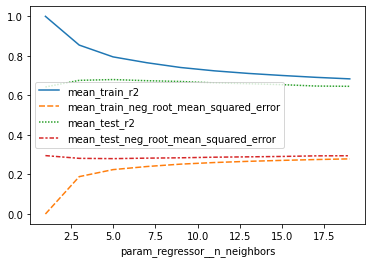

In [120]:
from sklearn.neighbors import KNeighborsRegressor

# Valeurs possibles du nombre de plus proches voisins
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = KNeighborsRegressor()

# fit et affichage des résultats
log_knnresults, log_knnbestresult = print_modelresult("SiteEnergyUse_log",
                                                        features,
                                                        m1,
                                                        params,
                                                        model,
                                                        score,
                                                        axis_scale="linear",
                                                        plot_param="n_neighbors")

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_neighbors': 7}

Sur le jeu de test : 0.776


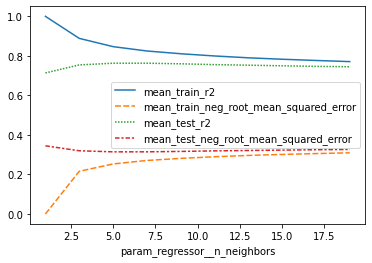

In [85]:
# fit et affichage des résultats
log_knnresults, log_knnbestresult = print_modelresult("TotalGHGEmissions_log",
                                                        features1b,
                                                        m1b,
                                                        params,
                                                        model,
                                                        score,
                                                        axis_scale="linear",
                                                        plot_param="n_neighbors")

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_neighbors': 5}

Sur le jeu de test : 0.675


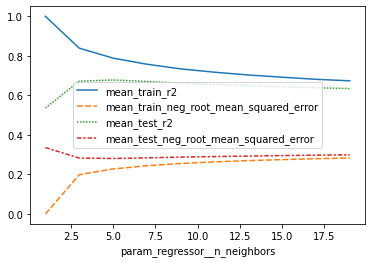

In [121]:
from sklearn.neighbors import KNeighborsRegressor

# Valeurs possibles du nombre de plus proches voisins
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = KNeighborsRegressor()

# fit et affichage des résultats
log_knnresults, log_knnbestresult = print_modelresult("SiteEnergyUse_log",
                                                        features1t,
                                                        m2p,
                                                        params,
                                                        model,
                                                        score,
                                                        axis_scale="linear",
                                                        plot_param="n_neighbors")

### III.2.3 Feature importance avec RandomForest

Premier essai avec l'algorithme RandomForestRegressor sur les mêmes features que précédemment et un nombre d'estimateurs à 100. Le but est à la fois d'obtenir une première estimation par cet algorithme et une mesure des feature_importances dans le but d'optimiser le modèle.

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

target = "SiteEnergyUse_log"

# One-hot encoding of categorical variable
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard scaling of numerical features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, oob_score=True))])

# Séparation prédicteurs - cible
X = m2p[features]
y = m2p[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)

reg.fit(X_train, y_train)
result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

KeyboardInterrupt: 

In [87]:
y_pred = reg.predict(X_test)
print("R2 score: {}".format(r2_score(y_test, y_pred)))

R2 score: 0.8663940258945038


In [45]:
df_importance = pd.DataFrame(data=result.importances_mean[sorted_idx[::-1]],
                             index=X_test.columns[sorted_idx[::-1]],
                             columns=["Importance"])
df_importance

,Importance
F1,1.263670
LargestPropertyUseType,0.128176
Electricity_ratio,0.126693
F2,0.043253
F3,0.023197
PrimaryPropertyType,0.013368
YearBuilt,0.012742
Neighborhood,0.010615
BuildingType,0.010048
NumberofFloors,0.009583


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_estimators': 1000}

Sur le jeu de test : 0.825


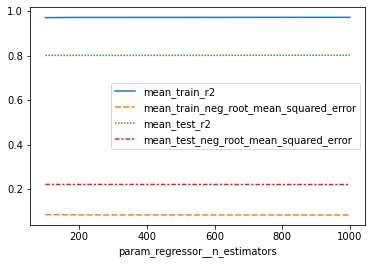

In [92]:
# seulement les "meilleures" features
bfeatures = df_importance.index[:3]
passthrough = ["F1"]

# Valeurs possibles du nombre d'arbres
params = {"n_estimators" : [100, 200, 500, 1000]}

# Choisir un score à optimiser, ici le R2
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = RandomForestRegressor(oob_score=True)

# fit et affichage des résultats
log_randomforestresults, log_randomforestbestresult = print_modelresult("SiteEnergyUse_log", 
                                                                        bfeatures,
                                                                        m1, 
                                                                        params,
                                                                        model, 
                                                                        score, 
                                                                        plot_param="n_estimators",
                                                                        axis_scale="linear",
                                                                        passthrough=passthrough)

**Modèle 1ter**

L'importance des variables LargestPropertyUseType et PrimaryPropertyType est-elle sous-estiméé à cause de leur association élevée? Pour vérifier cela, on fait tourner le modèle 1ter qui ne contient pas la variable PrimaryPropertyType.

R2 score sur le jeu de test: 0.8787320953308775


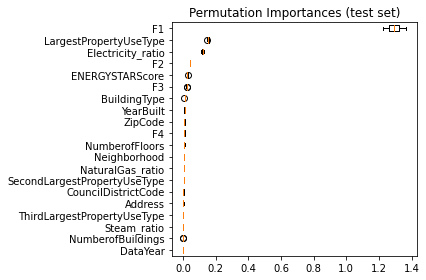

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

target = "SiteEnergyUse_log"

# One-hot encoding of categorical variable
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard scaling of numerical features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('pca', "passthrough", ["F1", "F2", "F3", "F4"]),
        ('num', numeric_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, oob_score=True))])

# Séparation prédicteurs - cible
X = m1t[features1t]
y = m1t[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 score sur le jeu de test: {}".format(r2_score(y_test, y_pred)))

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

R2 score: 0.911566248190552


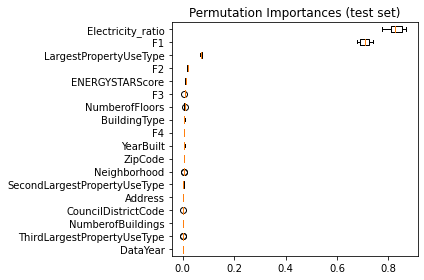

In [127]:
target = "TotalGHGEmissions_log"

# One-hot encoding of categorical variable
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard scaling of numerical features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('pca', "passthrough", ["F1", "F2", "F3", "F4"]),
        ('num', numeric_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, oob_score=True))])

# Séparation prédicteurs - cible

X = m1t[pd.Index(features1t).drop(["NaturalGas_ratio", "Steam_ratio"])]
y = m1t[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 score: {}".format(r2_score(y_test, y_pred)))

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [128]:
df_importance = pd.DataFrame(data=result.importances_mean[sorted_idx[::-1]], index=X_test.columns[sorted_idx[::-1]],
             columns=["Importance"])
df_importance

,Importance
Electricity_ratio,0.828667
F1,0.708743
LargestPropertyUseType,0.071346
F2,0.018492
ENERGYSTARScore,0.010480
F3,0.007552
NumberofFloors,0.006606
BuildingType,0.005182
F4,0.005102
YearBuilt,0.004598


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__max_depth': 50, 'regressor__n_estimators': 1000}

Sur le jeu de test : 0.899


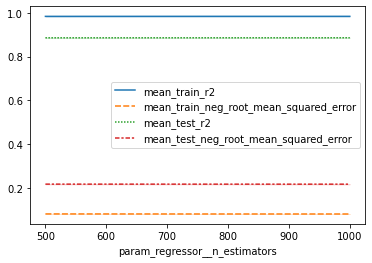

In [105]:
# seulement les "meilleures" features
bfeatures = df_importance.index[:4]

# Valeurs possibles du nombre d'arbres
params = {"n_estimators" : [500, 750, 1000], "max_depth" : [30, 50, 75, 100]}

# Choisir un score à optimiser, ici le R2
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = RandomForestRegressor(oob_score=True)

# fit et affichage des résultats
log_randomforestresults, log_randomforestbestresult = print_modelresult("TotalGHGEmissions_log", 
                                                              bfeatures,
                                                              m1t, 
                                                              params,
                                                              model, 
                                                              score, 
                                                              plot_param="n_estimators",
                                                              axis_scale="linear",
                                                                       passthrough=["F1", "F2"])

**Modèle 2pter**

R2 score sur le jeu de test: 0.8791477968548118


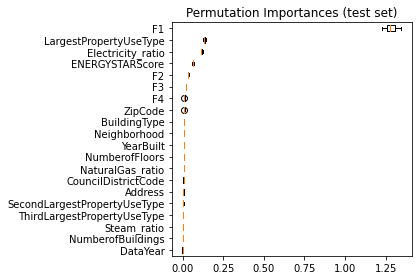

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

target = "SiteEnergyUse_log"

# One-hot encoding of categorical variable
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard scaling of numerical features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('pca', "passthrough", ["F1", "F2", "F3", "F4"]),
        ('num', numeric_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, oob_score=True))])

# Séparation prédicteurs - cible
X = m2pt[features1t]
y = m2pt[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 score sur le jeu de test: {}".format(r2_score(y_test, y_pred)))

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

R2 score: 0.9154825026614468


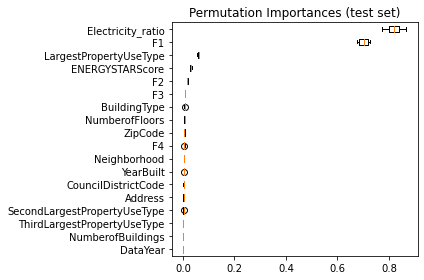

In [124]:
target = "TotalGHGEmissions_log"

# One-hot encoding of categorical variable
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard scaling of numerical features
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('pca', "passthrough", ["F1", "F2", "F3", "F4"]),
        ('num', numeric_transformer, selector(dtype_exclude="category")),
        ('cat', categorical_transformer, selector(dtype_include="category"))
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, oob_score=True))])

# Séparation prédicteurs - cible

X = m2pt[pd.Index(features1t).drop(["NaturalGas_ratio", "Steam_ratio"])]
y = m2pt[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 score: {}".format(r2_score(y_test, y_pred)))

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=0)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [125]:
df_importance = pd.DataFrame(data=result.importances_mean[sorted_idx[::-1]], index=X_test.columns[sorted_idx[::-1]],
             columns=["Importance"])
df_importance

,Importance
Electricity_ratio,0.821118
F1,0.701706
LargestPropertyUseType,0.060014
ENERGYSTARScore,0.030260
F2,0.017681
F3,0.008468
BuildingType,0.006907
NumberofFloors,0.006325
ZipCode,0.005854
F4,0.005181


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__max_depth': 50, 'regressor__n_estimators': 1000}

Sur le jeu de test : 0.899


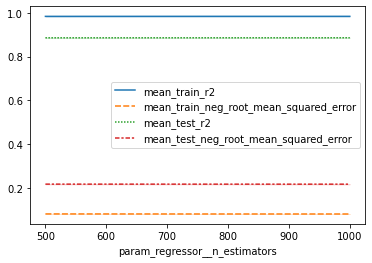

In [105]:
# seulement les "meilleures" features
bfeatures = df_importance.index[:4]

# Valeurs possibles du nombre d'arbres
params = {"n_estimators" : [500, 750, 1000], "max_depth" : [30, 50, 75, 100]}

# Choisir un score à optimiser, ici le R2
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = RandomForestRegressor(oob_score=True)

# fit et affichage des résultats
log_randomforestresults, log_randomforestbestresult = print_modelresult("TotalGHGEmissions_log", 
                                                              bfeatures,
                                                              m1t, 
                                                              params,
                                                              model, 
                                                              score, 
                                                              plot_param="n_estimators",
                                                              axis_scale="linear",
                                                                       passthrough=["F1", "F2"])

In [106]:
log_randomforestresults

,mean_train_r2,std_train_r2,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,param_regressor__n_estimators,param_regressor__max_depth,mean_fit_time,std_fit_time,mean_score_time,std_score_time
5,0.984070,0.000397,0.081648,0.000838,0.886377,0.011012,0.217753,0.013662,1000,50,25.789954,0.305314,0.397449,0.005660
0,0.983875,0.000356,0.082147,0.000712,0.886348,0.010580,0.217813,0.013637,500,30,14.950243,1.345489,0.311018,0.091399
10,0.984085,0.000338,0.081612,0.000784,0.886346,0.010563,0.217810,0.013510,750,100,19.506135,0.365891,0.302360,0.000977
8,0.984028,0.000288,0.081762,0.000794,0.886309,0.010696,0.217836,0.013539,1000,75,25.747163,0.241279,0.399098,0.002812
9,0.983953,0.000301,0.081950,0.000564,0.886298,0.011034,0.217840,0.013892,500,100,12.834796,0.038677,0.204664,0.002036
2,0.984014,0.000359,0.081792,0.000710,0.886271,0.010697,0.217882,0.013693,1000,30,30.508420,0.687061,0.502036,0.095049
1,0.984026,0.000303,0.081766,0.000805,0.886259,0.010778,0.217886,0.013674,750,30,22.292122,0.731448,0.322730,0.028170
11,0.984082,0.000252,0.081623,0.000590,0.886239,0.011026,0.217894,0.013819,1000,100,30.575294,6.801412,0.448937,0.079500
7,0.983996,0.000328,0.081841,0.000758,0.886228,0.010873,0.217911,0.013711,750,75,19.362166,0.169764,0.304888,0.004703
3,0.983947,0.000343,0.081965,0.000882,0.886111,0.010705,0.218023,0.013482,500,50,12.915701,0.114779,0.211410,0.016805


### III.2.4 GradientBoostingRegressor

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_estimators': 2000}

Sur le jeu de test : 0.904


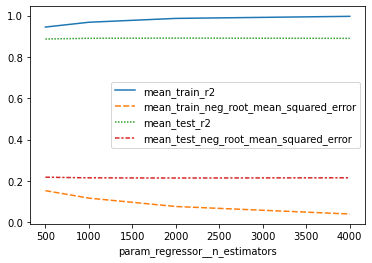

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

# Valeurs possibles du nombre d'arbres
params = {"n_estimators": [500, 1000, 2000, 4000]}

# Choisir un score à optimiser, et/ou une erreur à minimiser ici le R2 et le RMSE
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model=GradientBoostingRegressor()

# fit et affichage des résultats
log_grboostresults, log_grboostbestresult = print_modelresult("TotalGHGEmissions_log", 
                                                              bfeatures,
                                                              m1, 
                                                              params,
                                                              model, 
                                                              score, 
                                                              plot_param="n_estimators",
                                                              axis_scale="linear", 
                                                              passthrough=["F1", "F2"])

In [103]:
log_grboostresults

,mean_train_r2,std_train_r2,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,param_regressor__n_estimators,mean_fit_time,std_fit_time,mean_score_time,std_score_time
2,0.986306,0.000563,0.075696,0.001702,0.890876,0.005868,0.213533,0.010054,2000,19.109503,1.479029,0.085927,0.054584
1,0.967689,0.001112,0.116274,0.001930,0.889947,0.006534,0.214472,0.011371,1000,9.214462,0.529435,0.034221,0.000666
3,0.996295,0.000168,0.039371,0.000961,0.889668,0.004668,0.214699,0.008505,4000,37.887173,2.463463,0.104103,0.001490
0,0.944402,0.001610,0.152529,0.001996,0.886584,0.009222,0.217627,0.012532,500,5.016724,0.823905,0.029140,0.012572


# VI Choix du modèle

In [ ]:
index = ["mean_test_r2", "mean_train_r2","mean_test_neg_root_mean_squared_error", "mean_fit_time"]
d = {"Ridge":log_ridgebestresult[index], 
      "Lasso":log_lassobestresult[index],
      "kNN":log_knnbestresult[index],
      "SVM":log_svm_bestresult[index], 
      "SVM Non-linéaire": log_kernelsvm_bestresult[index],
      "randomforest":log_randomforestbestresult[index], 
      "gradient boosting":log_grboostbestresult[index]}
model_1 = pd.DataFrame(data=d)
model_1